# Homework

1. Train NN model with custom linear architecture on MNIST or on any dataset from Kaggle (image data with resolution not higher than 80x80 pixels - 
[Sign language MNIST](https://www.kaggle.com/datasets/datamunge/sign-language-mnist), 
[A-Z Handwritten Alphabet](https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format), etc.)
2. Visualize epoch progress (loss and accuracy curves)
3. Visualize 10 random elements from test set and model results for those elements
<hr/>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

### Define custom linear architecture

In [2]:
class CustomLinearNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(CustomLinearNN, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

### Load dataset  and prepare data loaders

In [4]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 10504800.73it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 9550275.45it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 6593810.15it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4525066.22it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



### Initialize model

In [5]:
model = CustomLinearNN(input_size=28*28, num_classes=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Train loop


In [6]:
num_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
    
    test_loss = running_loss / len(test_loader)
    test_accuracy = correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')


Epoch [1/10], Train Loss: 0.4677, Train Acc: 0.8684, Test Loss: 0.3250, Test Acc: 0.9084
Epoch [2/10], Train Loss: 0.3255, Train Acc: 0.9059, Test Loss: 0.3059, Test Acc: 0.9109
Epoch [3/10], Train Loss: 0.3091, Train Acc: 0.9111, Test Loss: 0.2910, Test Acc: 0.9153
Epoch [4/10], Train Loss: 0.2993, Train Acc: 0.9141, Test Loss: 0.2863, Test Acc: 0.9172
Epoch [5/10], Train Loss: 0.2947, Train Acc: 0.9154, Test Loss: 0.2869, Test Acc: 0.9173
Epoch [6/10], Train Loss: 0.2903, Train Acc: 0.9179, Test Loss: 0.2844, Test Acc: 0.9168
Epoch [7/10], Train Loss: 0.2867, Train Acc: 0.9183, Test Loss: 0.2929, Test Acc: 0.9155
Epoch [8/10], Train Loss: 0.2859, Train Acc: 0.9193, Test Loss: 0.2940, Test Acc: 0.9132
Epoch [9/10], Train Loss: 0.2807, Train Acc: 0.9205, Test Loss: 0.2798, Test Acc: 0.9218
Epoch [10/10], Train Loss: 0.2793, Train Acc: 0.9212, Test Loss: 0.2876, Test Acc: 0.9205


### Function to visualize epoch progress

In [20]:
def plot_progress(train_losses, train_accuracies, test_losses, test_accuracies):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss', color='blue', linewidth=5)
    plt.plot(test_losses, label='Test Loss', color='yellow', linewidth=5)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curve')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy', color='green', linewidth=5)
    plt.plot(test_accuracies, label='Test Accuracy', color='orange', linewidth=5)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    
    plt.show()

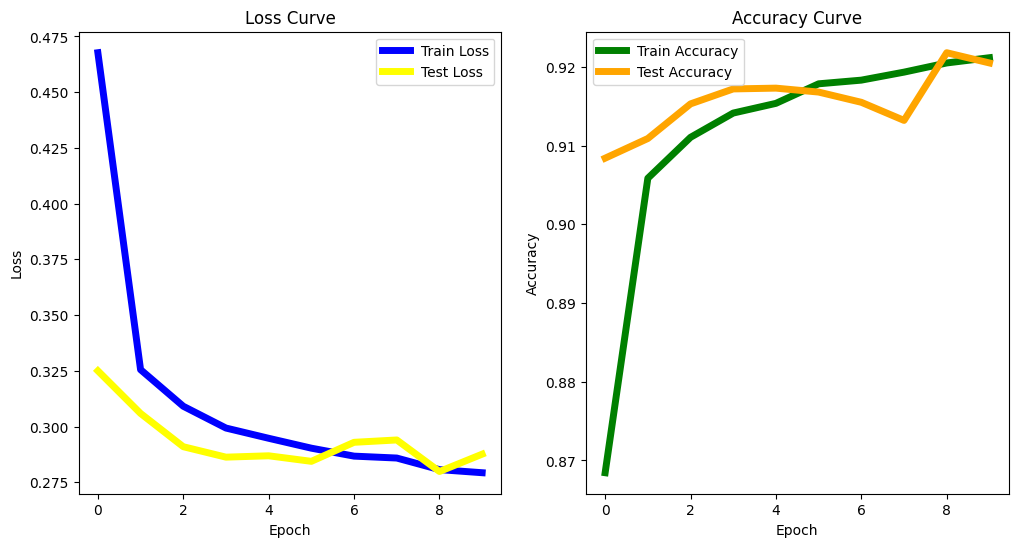

In [21]:
plot_progress(train_losses, train_accuracies, test_losses, test_accuracies)

### Function to visualize random elements from test set along with model predictions

In [16]:
def visualize_results(model, test_loader, num_samples=10):
    model.eval()
    with torch.no_grad():
        plt.figure(figsize=(12, 8))
        for i in range(num_samples):
            plt.subplot(2, 5, i+1)
            index = np.random.randint(len(test_loader.dataset))
            image, label = test_loader.dataset[index]
            output = model(image.unsqueeze(0))
            _, prediction = torch.max(output, 1)
            plt.imshow(image.squeeze(), cmap='gray')
            plt.title(f'Actual: {label}, Predicted: {prediction.item()}')
            plt.axis('off')
        plt.show()

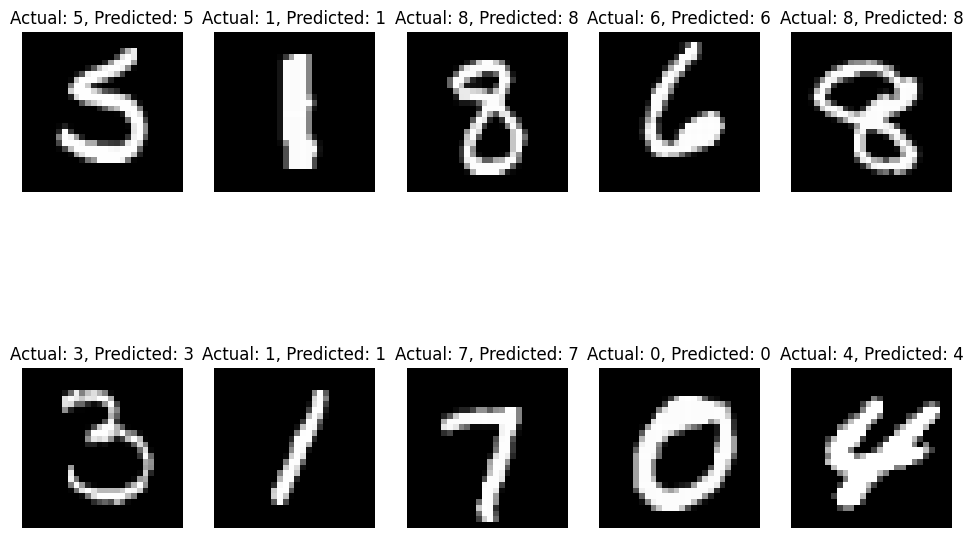

In [17]:
visualize_results(model, test_loader)